In [1]:
from main import *
import matplotlib.pyplot as plt
import time 

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [24]:
# try decreasing time for steady state check to speed it up...
# try increasing time to reach steady state?
# try increasing time step?
# try to build an artificial network with integral feedback... microrna feedback?

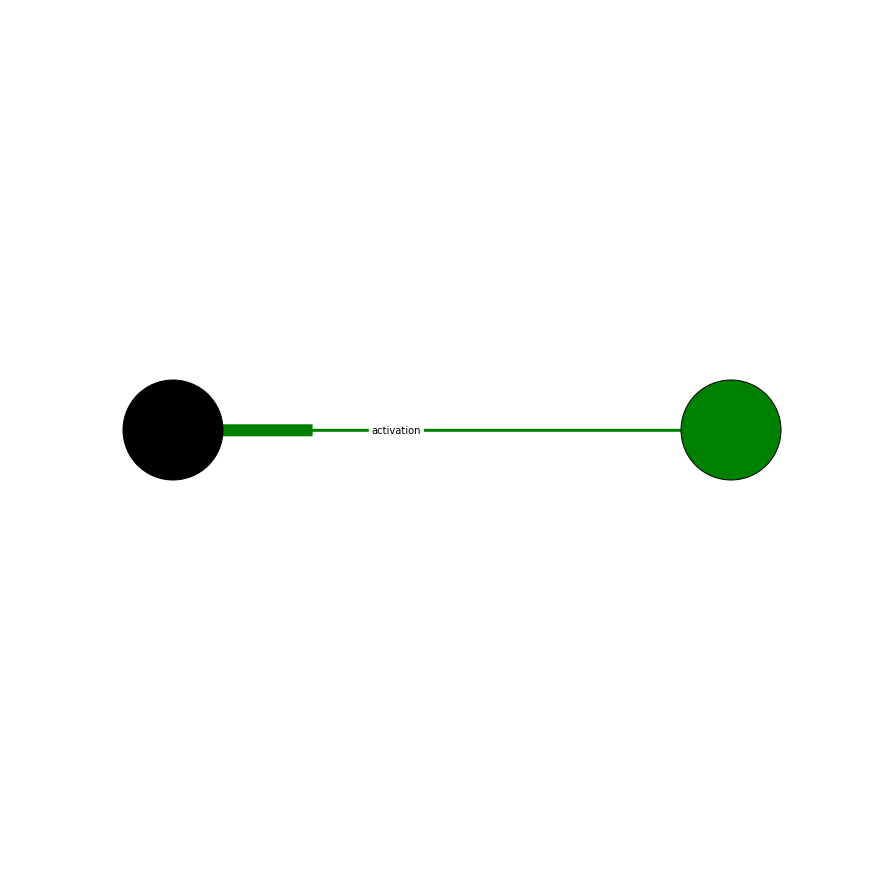

In [35]:
# create single cell with integral feedback via
cell = Cell(name=1, initial_genes=1, permanent_genes=1)
cell.add_transcriptional_regulation(tf=1, gene=2, mod_type='activation')
cell.add_transcriptional_regulation(tf=3, gene=0, mod_type='repression')

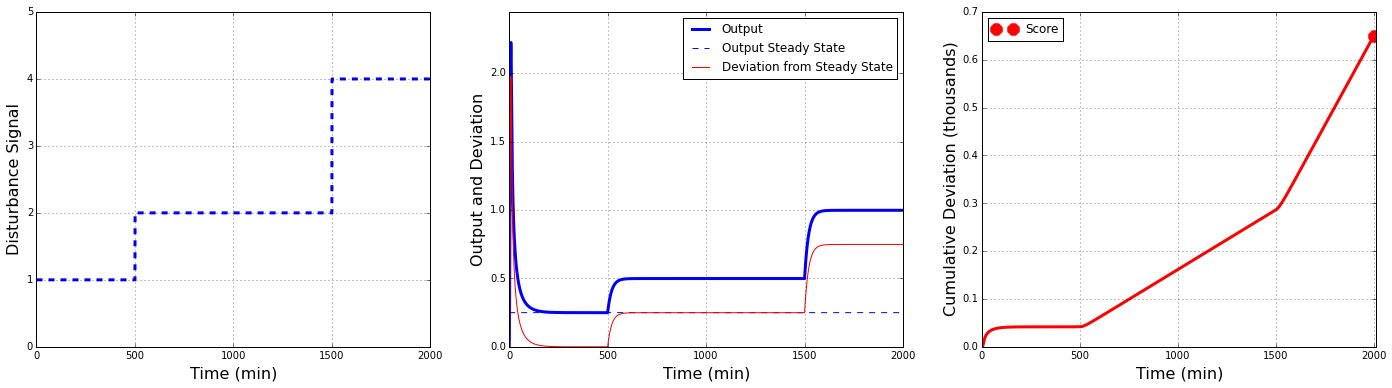

In [41]:
# feedback via post-translational regulation via intermediate
cell = Cell(name=1, initial_genes=1, permanent_genes=1)
cell.add_transcriptional_regulation(tf=1, gene=2, mod_type='activation')
cell.add_catalytic_degradation(p1=1, p2=3)
score = get_fitness_1(cell, mode='langevin', plot=True)

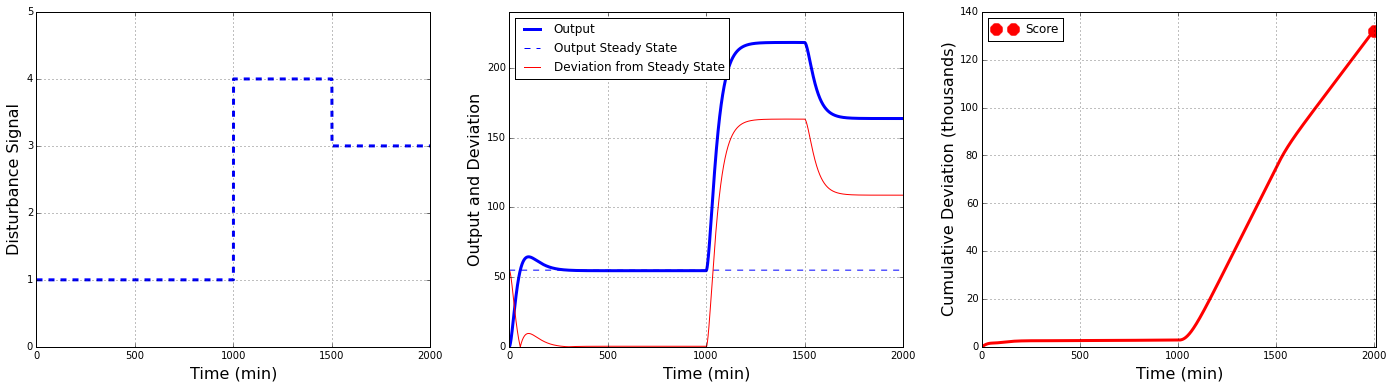

In [42]:
# integral feedback via transcriptional repression
cell = Cell(name=1, initial_genes=1, permanent_genes=1)
cell.add_transcriptional_regulation(tf=1, gene=2, mod_type='activation')
cell.add_transcriptional_regulation(tf=3, gene=0, mod_type='repression')
score = get_fitness_1(cell, mode='langevin', plot=True)

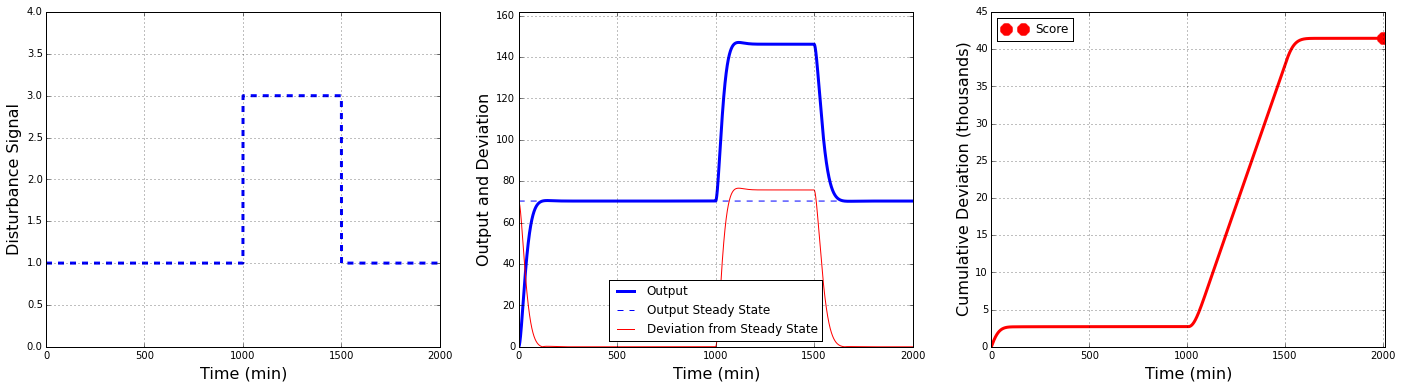

In [43]:
# proportional feedback via auto-repression
cell = Cell(name=1, initial_genes=1, permanent_genes=1)
cell.add_transcriptional_regulation(tf=1, gene=0, mod_type='repression')


score = get_fitness_1(cell, mode='langevin', plot=True)

3 is index of output in states
1 is output node


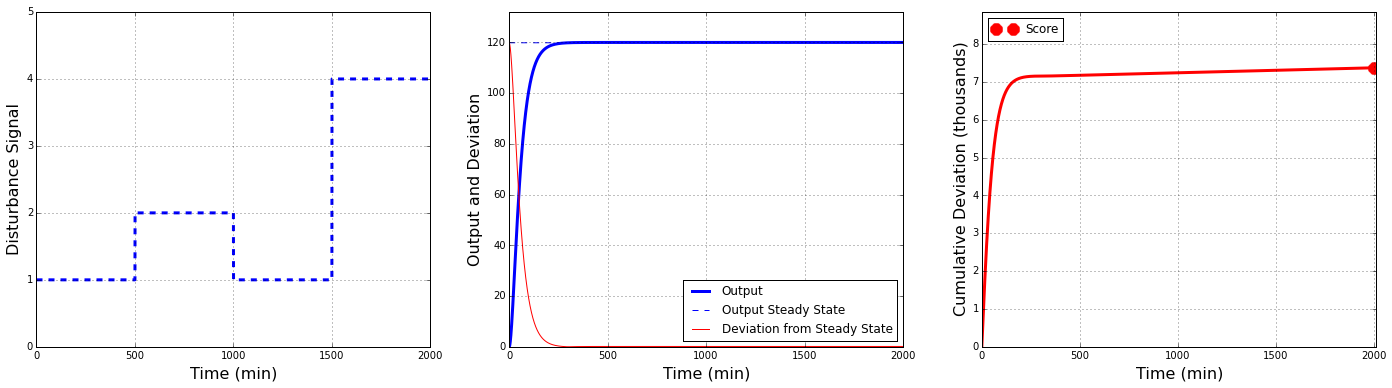

In [62]:
# proportional feedback via auto-repression
cell = Cell(name=1, initial_genes=1, permanent_genes=2)

# produce sensor
cell.add_transcriptional_regulation(tf=1, gene=4, mod_type='activation')

# sensor degrades driver (Comparison)
cell.add_catalytic_degradation(3, 5)

# driver  activates mrna
cell.add_transcriptional_regulation(tf=3, gene=0, mod_type='activation')


score = get_fitness_2(cell, mode='langevin', plot=True)

(0, 50)

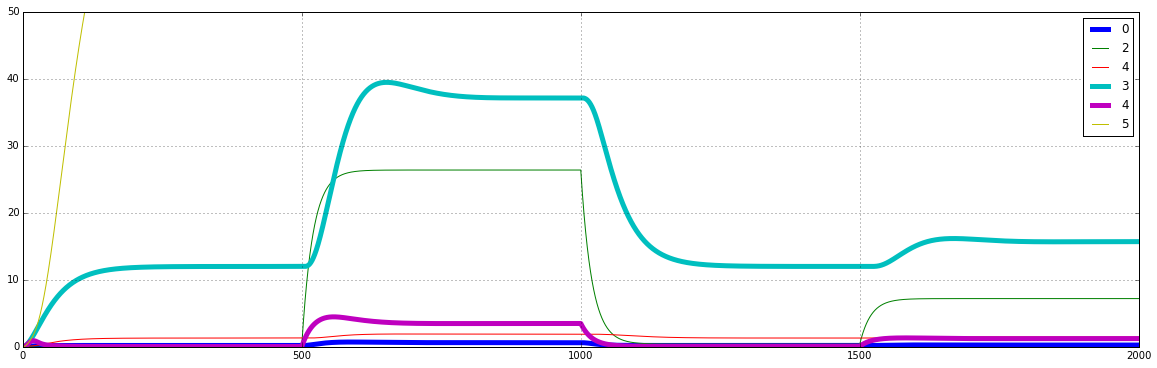

In [100]:
# run fitness 2 test

dt = 0.1
mode = 'langevin'
plateau_count = 3
plateau_duration = 500
input_node = 2
output_node = 1

# create sequence of plateaus for disturbance signal
disturbance = Signal(name='driver', duration=plateau_duration, dt=dt, channels=1)
disturbance.step(magnitude=1)
for stage in range(0, plateau_count):
    new_level = np.random.randint(1, 150)
    next_plateau = Signal(name=stage, duration=plateau_duration, dt=dt, channels=1)
    next_plateau.step(magnitude=new_level)
    disturbance = disturbance.merge_signals(next_plateau, shift=True, gap=dt)

# run simulation
states, energy_usage, key = cell.simulate(disturbance, input_node=input_node, mode=mode, retall=True)
output = states[key[output_node], :]

key_flipped = {new_index:old_index for old_index, new_index in key.items()}

# plot everything
ax = create_subplot_figure(dim=(1, 1))[0]
for i, state in enumerate(states):
    if i in [0, 3, 4]:
        ax.plot(disturbance.time, state, label=i, linewidth=5)
    else:
        ax.plot(disturbance.time, state, label=key_flipped[i])
ax.legend(loc=0)
ax.set_ylim(0, 50)

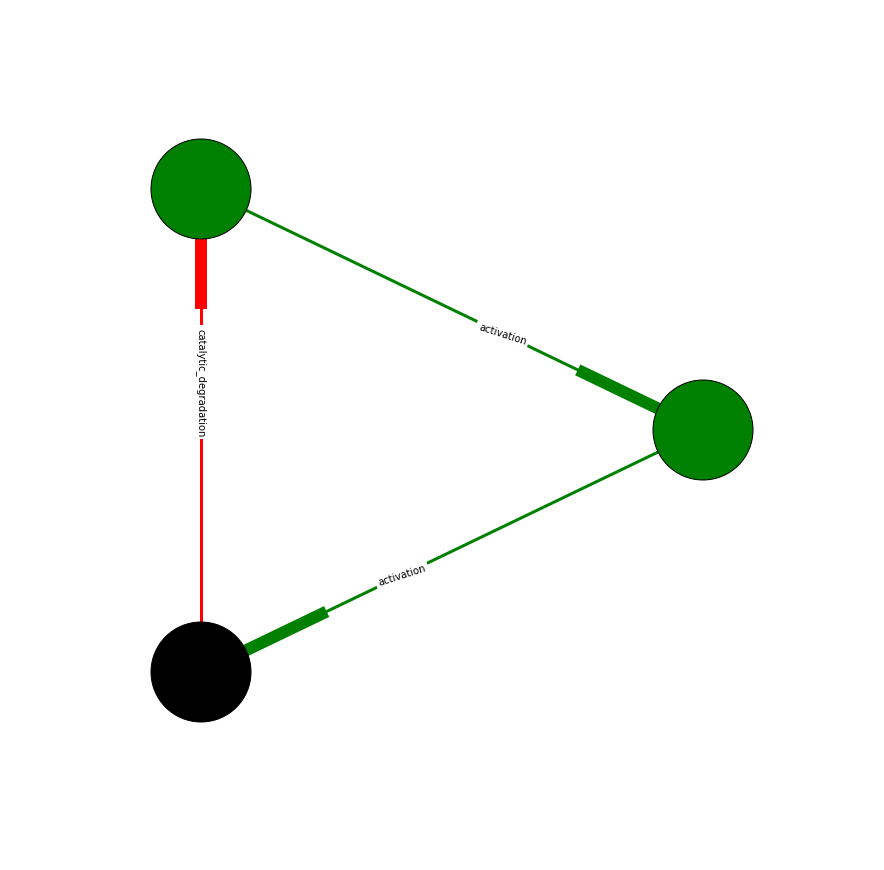

In [89]:
# proportional feedback via auto-repression
cell = Cell(name=1, initial_genes=1, permanent_genes=2)

# produce sensor
cell.add_transcriptional_regulation(tf=1, gene=4, mod_type='activation')

# sensor degrades driver (Comparison)
cell.add_catalytic_degradation(3, 5)

# driver  activates mrna
cell.add_transcriptional_regulation(tf=3, gene=0, mod_type='activation')

cell.show_topology()

(0, 5)

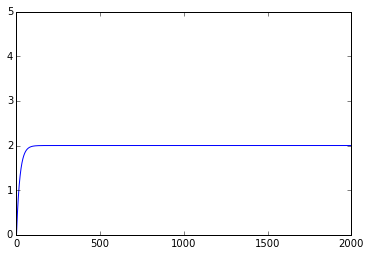

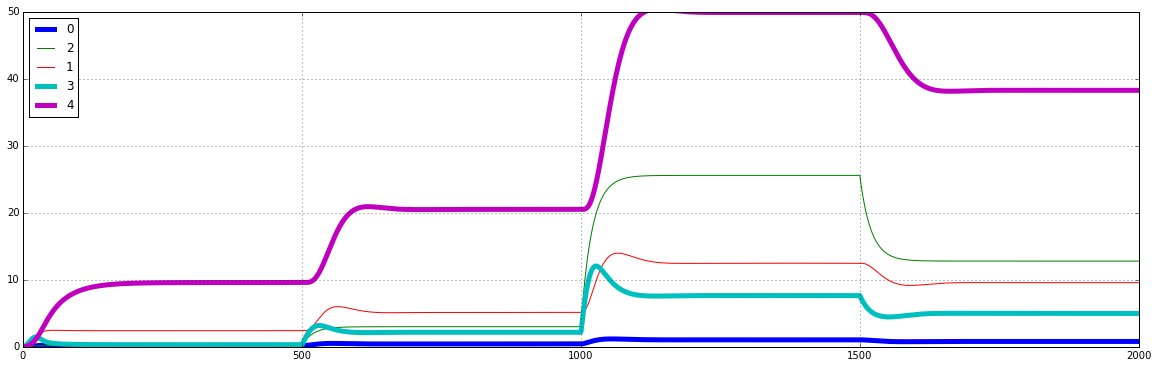

In [105]:
# proportional feedback via auto-repression
cell = Cell(name=1, initial_genes=0, permanent_genes=2)

# produce sensor via modification
cell.add_protein_modification(substrate=1)

# sensor degrades driver (Comparison)
cell.add_catalytic_degradation(3, 4)

# driver  activates mrna
cell.add_transcriptional_regulation(tf=3, gene=0, mod_type='activation')

test(cell)

In [137]:
# run fitness 2 test
def test(cell):
    dt = 0.1
    mode = 'langevin'
    plateau_count = 5
    plateau_duration = 500
    input_node = 2
    output_node = 1

    # create sequence of plateaus for disturbance signal
    disturbance = Signal(name='driver', duration=plateau_duration, dt=dt, channels=1)
    disturbance.step(magnitude=1)
    for stage in range(0, plateau_count):
        new_level = np.random.randint(1, 5)*0.5
        next_plateau = Signal(name=stage, duration=plateau_duration, dt=dt, channels=1)
        next_plateau.step(magnitude=new_level)
        disturbance = disturbance.merge_signals(next_plateau, shift=True, gap=dt)

    # run simulation
    states, energy_usage, key = cell.simulate(disturbance, input_node=input_node, mode=mode, retall=True)
    output = states[key[output_node], :]

    key_flipped = {new_index:old_index for old_index, new_index in key.items()}

    # plot everything
    ax = create_subplot_figure(dim=(1, 1))[0]
    for i, state in enumerate(states):
            ax.plot(disturbance.time, state, label=key_flipped[i], linewidth=3)
    ax.legend(loc=0)
    ax.set_ylim(0, 50)
    
    return disturbance, states
    

In [16]:
def get_ss_test(cell, output):
    """
    Returns steady state level of specified node given zero initial conditions.

    Parameters:
        cell (cell object) - gene regulatory network of interest
        output (int) - node of interest

    Returns:
        output_ss (float) - steady state level of specified node
    """
    dt = 0.1
    blank_signal = Signal(name='get_ss', duration=300, dt=dt, signal=None)
    states, _, key = cell.simulate(blank_signal, mode='langevin', retall=True)
    output_ss = states[key[output], -1]
    
    plt.plot(blank_signal.time, states[key[output], :])
    
    return output_ss

(0, 10)

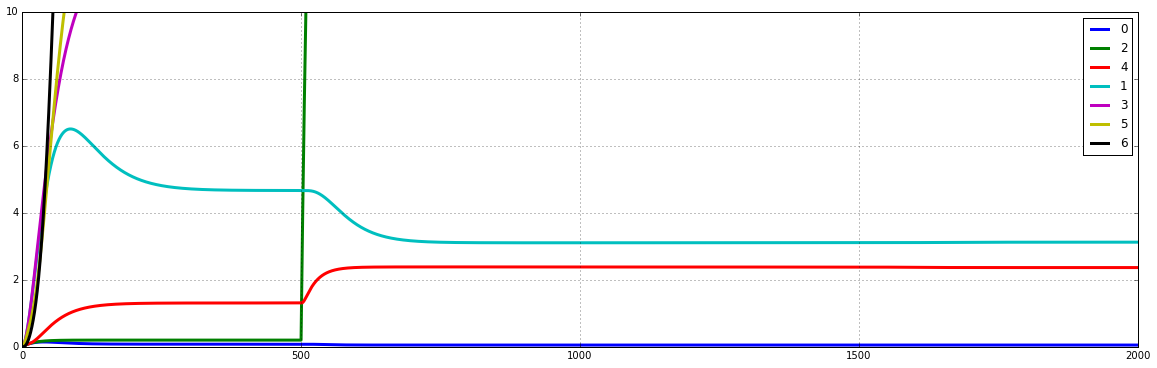

In [121]:
# incoherent feedforward
cell = Cell(name=1, initial_genes=1, permanent_genes=2)

# input node activates intermediate buffer
cell.add_transcriptional_regulation(tf=3, gene=4, mod_type='activation')

# buffer degrades output
cell.add_transcriptional_regulation(tf=5, gene=0, mod_type='repression')

# buffer degrades itself
cell.add_protein_modification(substrate=5)

test(cell)
ax = plt.gca()
ax.set_ylim(0, 10)

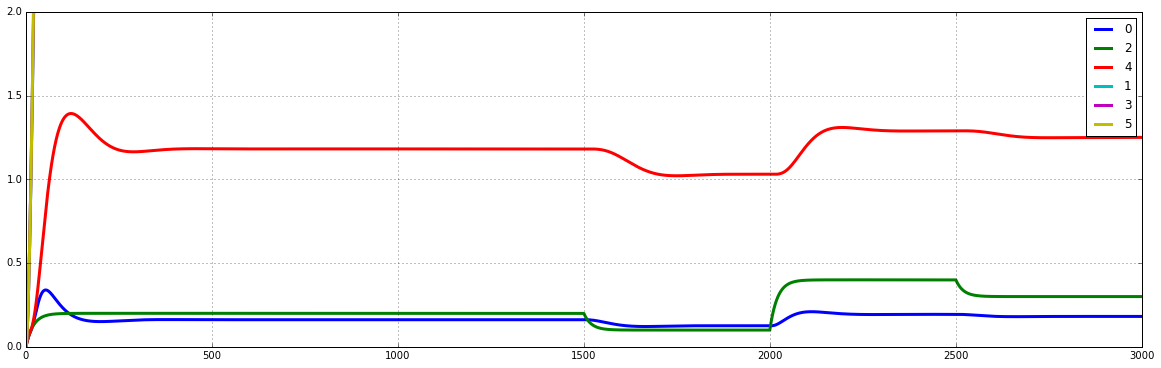

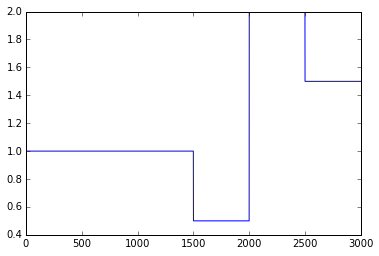

In [140]:
# NFBL
cell = Cell(name=1, initial_genes=1, permanent_genes=2)

# input node activates output node
cell.add_transcriptional_regulation(tf=3, gene=0, mod_type='activation')

# output activates buffer
cell.add_transcriptional_regulation(tf=1, gene=4, mod_type='activation')

# buffer represses output
cell.add_transcriptional_regulation(tf=5, gene=0, mod_type='repression')

disturbance, states = test(cell)
ax = plt.gca()
ax.set_ylim(0, 2)

plt.figure()
plt.plot(disturbance.time, disturbance.signal[0, :])


In [133]:
np.shape(disturbance.signal[0, :]) == np.shape(disturbance.time)

True

In [ ]:
# need a buffer species!

In [152]:
np.random.choice([1, 2, 3, 4])

1